<h1>Exploring Titanic Dataset</h1>
<autor>by Javier Villarroel</autor>



<ol>
  <li><a href="#Features Engineering">Features Engineering</a>
    <ol>
      <li><a href="#Dummy Features">Dummy Features</a></li>
      <li><a href="#tunning">Parameters Tunning</a></li>
    </ol>
  </li>
  <li><a href="#pca">PCA components</a></li>
  <li><a href="#Predictions">Predictions</a></li>
</ol>

In [1]:
#Libraries to import

import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

In [2]:
# Import dataset 

titanic_train = pandas.read_csv('train.csv')
titanic_test = pandas.read_csv('test.csv')

VARIABLE DESCRIPTIONS:

<table width="100%">
  <tbody>
      <tr>
      <td>PassengerId <br>
      </td>

      <td> Passenger Identity Number <br>
      </td>
    </tr>
  
    <tr>
      <td>
        <p>Survived</p>
      </td>

      <td>Survival (1 = Yes, 0&nbsp;=&nbsp;No)</td>
    </tr>

    <tr>
      <td>PClass</td>

      <td>
        <p>Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</p>
      </td>
    </tr>

    <tr>
      <td>Name</td>

      <td>Passanger Name</td>
    </tr>
    
        <tr>
      <td>Sex<br>
      </td>

      <td>Gender<br>
      </td>
    </tr>

    <tr>
      <td>Age</td>

      <td>Age</td>
    </tr>

    <tr>
      <td>Sibsp<br>
      </td>

      <td>Number of Siblings/&nbsp;Spouses Aboard<br>
      </td>
    </tr>

    <tr>
      <td>Parch</td>

      <td>Number of Parents/ Children Aboard</td>
    </tr>

    <tr>
      <td>Ticket<br>
      </td>

      <td>Ticket Number<br>
      </td>
    </tr>

    <tr>
      <td>Fare</td>

      <td>Passenger Fare</td>
    </tr>

    <tr>
      <td>Cabin</td>

      <td>Cabin</td>
    </tr>

    <tr>
      <td>Embarked</td>

      <td>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</td>
    </tr>
  </tbody>
</table>

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


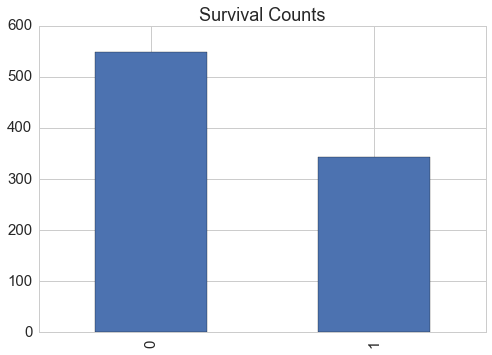

In [5]:
titanic_train['Survived'].value_counts().plot(kind='bar', title='Survival Counts')

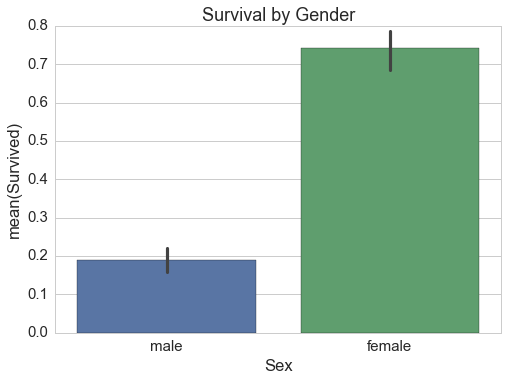

In [6]:
sns.barplot(x="Sex", y="Survived", data=titanic_train)
sns.plt.title('Survival by Gender')

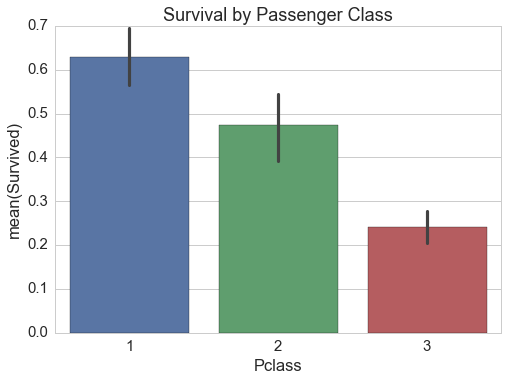

In [7]:
sns.barplot(x="Pclass", y="Survived", data=titanic_train)
sns.plt.title('Survival by Passenger Class')

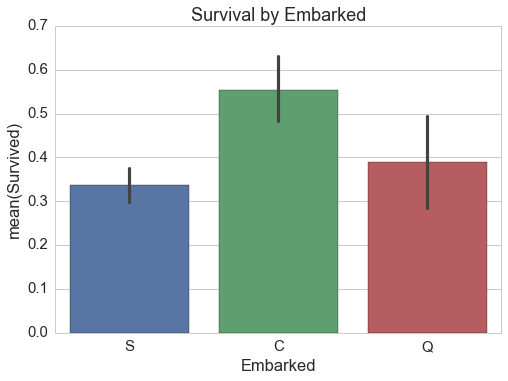

In [8]:
sns.barplot(x="Embarked", y="Survived", data=titanic_train)
sns.plt.title('Survival by Embarked')

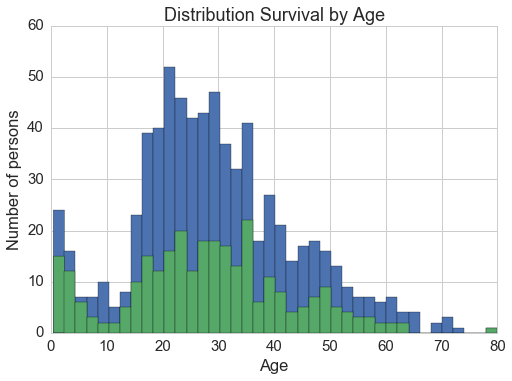

In [9]:
titanic_train["Age"].hist(bins=40)
titanic_train[titanic_train['Survived']==1]["Age"].hist(bins=40)
sns.plt.xlabel('Age')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Age')

Interesting! there were many kids

Remember, (891-714) 177 row haven't age values

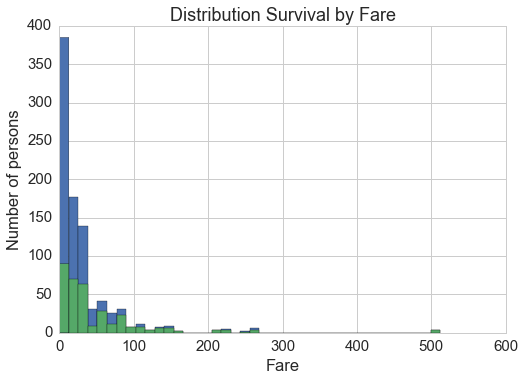

In [10]:
titanic_train["Fare"].hist(bins=40)
titanic_train[titanic_train['Survived']==1]["Fare"].hist(bins=40)
sns.plt.xlabel('Fare')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Fare')

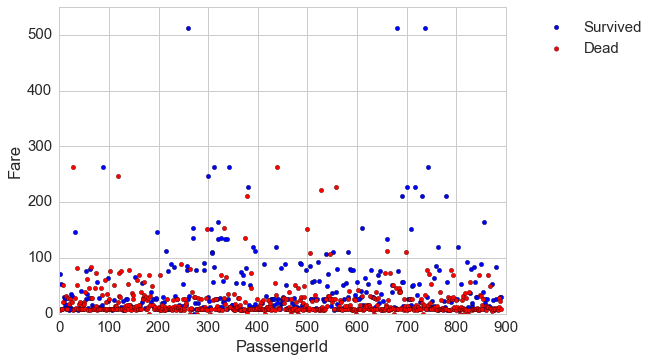

In [11]:

plt.scatter(titanic_train[titanic_train['Survived']==1]['PassengerId'],
            titanic_train[titanic_train['Survived']==1]['Fare'], c = 'b')
plt.scatter(titanic_train[titanic_train['Survived']==0]['PassengerId'],
            titanic_train[titanic_train['Survived']==0]['Fare'], c = 'r')

plt.xlabel('PassengerId')
plt.ylabel('Fare')
plt.xlim([0,900])
plt.ylim([0,550])
plt.legend(('Survived','Dead'),loc='upper left',fontsize=15,bbox_to_anchor=(1.05, 1))

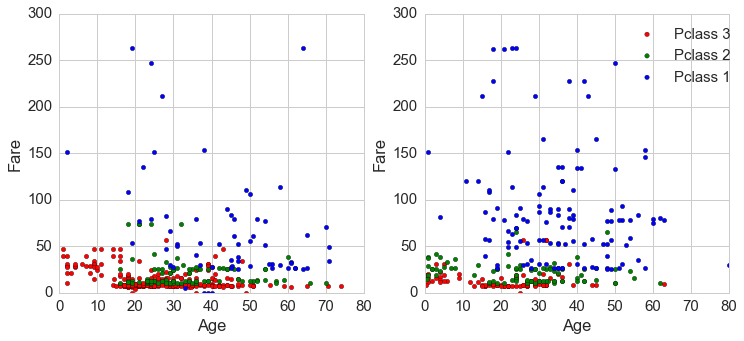

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==3)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==3)]['Fare'], c = 'r')
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==2)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==2)]['Fare'], c = 'g')
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==1)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==1)]['Fare'], c = 'b')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')
axes[0].set_xlim([0,80])
axes[0].set_ylim([0,300])

axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==3)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==3)]['Fare'], c = 'r')
axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==2)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==2)]['Fare'], c = 'g')
axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==1)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==1)]['Fare'], c = 'b')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fare')
axes[1].set_xlim([0,80])
axes[1].set_ylim([0,300])
axes[1].legend(('Pclass 3','Pclass 2', 'Pclass 1'),fontsize=15,bbox_to_anchor=(1.05, 1))

<h3>Before the creation of features, we observe again some features</h3>

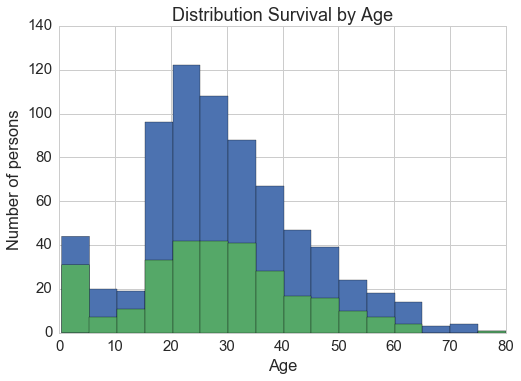

In [13]:
titanic_train["Age"].hist(bins=16)
titanic_train[titanic_train['Survived']==1]["Age"].hist(bins=16)
sns.plt.xlabel('Age')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Age')

we can divide age in kids(≤5), teen(5-15), young(15-30), adult(30-65), old(>65)

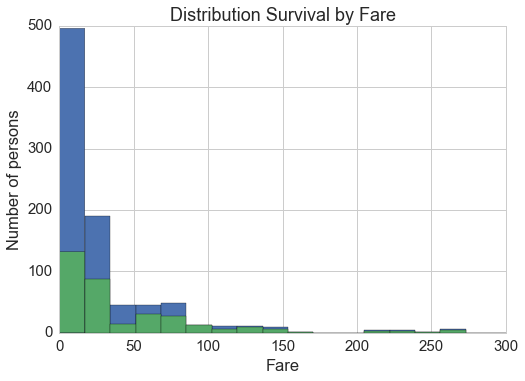

In [14]:
titanic_train["Fare"].hist(bins=30)
titanic_train[titanic_train['Survived']==1]["Fare"].hist(bins=30)
sns.plt.xlim([0,300])
#sns.plt.ylim([0,50])
sns.plt.xlabel('Fare')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Fare')

I separe this features in very very cheap ≤100, cheap 10-40, normal 40-50, plus 50-100, luxury 100-300, royal 300 or more <br>
<br>
I have change several time the x and y limits, and bin, in order to observe how to separate the features

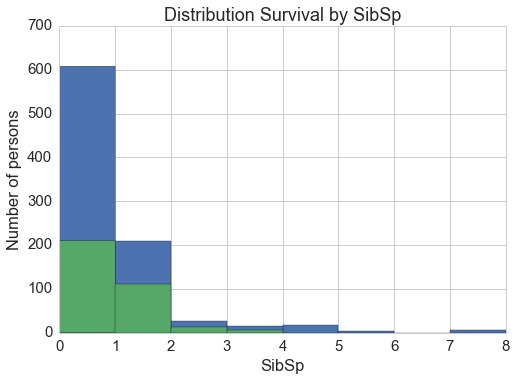

In [15]:
titanic_train["SibSp"].hist(bins=8)
titanic_train[titanic_train['Survived']==1]["SibSp"].hist(bins=4)
sns.plt.xlim([0,8])
#sns.plt.ylim([0,50])
sns.plt.xlabel('SibSp')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by SibSp')

I separte sibsp in 0, 123, 4 or more

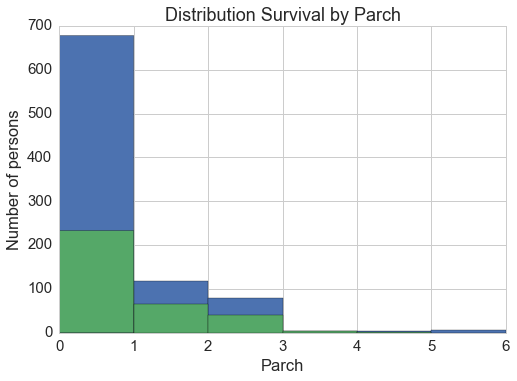

In [16]:
titanic_train["Parch"].hist(bins=6)
titanic_train[titanic_train['Survived']==1]["Parch"].hist(bins=5)
sns.plt.xlim([0,6])
#sns.plt.ylim([0,50])
sns.plt.xlabel('Parch')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Parch')

I separate in 0, 1-2, 3 or more,

<h1>Features Engineering<a name="Features Engineering"></a></h1>


In [17]:
def Sex_encode(val):
    if val == 'female':
        return 1
    else:
        return 0
    
titanic_train['Sex_n'] = titanic_train['Sex'].apply(Sex_encode) 
titanic_test['Sex_n'] = titanic_test['Sex'].apply(Sex_encode)

In [18]:

#there is one NaN value in test['Fare'], it is changed by a similar person in the data
titanic_test['Fare'] = titanic_test['Fare'].fillna(6.24)

titanic_train['Embarked'] = titanic_train['Embarked'].fillna('Q')

In [19]:
def name_title_creation(df):
    names_titles = df['Name']
    def return_title(name):
        title = name.split('.')[0]
        title = title.split(',')[1]
        return title
    
    names_titles = names_titles.apply(return_title).copy()
    
    names_titles = names_titles.replace([' Capt', ' Col', ' Major', ' Dr', ' Officer', ' Rev'], 
                     ['officer','officer','officer','officer','officer','officer'])
    names_titles = names_titles.replace([' Dona', ' Lady', ' the Countess'], 
                     ['Lady','Lady','Lady'])
    names_titles = names_titles.replace([' Don', ' Jonkheer', ' Sir'], 
                     ['Sir','Sir','Sir'])
    names_titles = names_titles.replace([' Mme', ' Mrs'], 
                     ['Mrs','Mrs'])
    names_titles = names_titles.replace([' Miss', ' Mmes', ' Mlle', ' Ms'], 
                     ['Miss','Miss','Miss', 'Miss'])
    names_titles = names_titles.replace([' Mr', ' Master'], 
                     ['Mr','Master'])

    return names_titles

In [20]:
titanic_train['name_title'] = name_title_creation(titanic_train)
titanic_test['name_title'] = name_title_creation(titanic_test)
titanic_train['name_title'].value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
officer     18
Sir          3
Lady         2
Name: name_title, dtype: int64

<h2>Dummy Features<a href="#Dummy Features"></a></h2>

In [21]:
#Creation of Dummy features for Sex, Embarker, Pclass

def dummy_features(df):
    new_embarked = pandas.get_dummies(df['Embarked'],prefix='Embarked')
    #new_sex = pandas.get_dummies(df['Sex'])
    new_Pclass = pandas.get_dummies(df['Pclass'],prefix='Pclass')
    new_title = pandas.get_dummies(df['name_title'],prefix='titles')
    new_df = pandas.concat([new_embarked,new_Pclass,new_title],axis=1)
    return new_df

In [22]:
pre_train = pandas.concat([titanic_train,dummy_features(titanic_train)],axis=1)
pre_test = pandas.concat([titanic_test,dummy_features(titanic_test)],axis=1)

In [23]:
#Sustitution of Nan in Age, by a decision tree model

def age_sustitor(train, test):
    age = pandas.concat([train,test],axis=0)
    age_train = age[age['Age']==age['Age']].copy()
    
    from sklearn.tree import DecisionTreeRegressor
    col = ['SibSp','Parch','Fare', 
      'Embarked_C', 'Embarked_S',  
       'Pclass_1','Pclass_3'
    ]
    age_model = DecisionTreeRegressor(min_samples_split=10,random_state=100)
    age_model.fit(age_train[col],age_train['Age'])
    return {'col': col, 'model': age_model}

age_model = age_sustitor(pre_train,pre_test)

In [24]:
def age_sustitution(row):
    if row['Age'] != row['Age']:
        return age_model['model'].predict([row[age_model['col']]])[0]
    else:
        return row['Age']
    
pre_train['Age_n'] = pre_train.apply(age_sustitution, axis=1)
pre_test['Age_n']  = pre_test.apply(age_sustitution, axis=1)

In [25]:
def Age_label(val):
    
    if val < 5.:
        return 'kids'
    if val < 15.:
        return 'teens'
    if val < 30.:
        return 'young'
    if val < 60.:
        return 'adult'
    return 'old'

pre_train['Age_labels'] = pre_train['Age_n'].apply(Age_label).copy()
pre_test['Age_labels'] = pre_test['Age_n'].apply(Age_label).copy()

In [26]:
pre_train['Age_labels'].value_counts()

young    389
adult    380
teens     50
kids      40
old       32
Name: Age_labels, dtype: int64

In [27]:
def Fare_label(val):
    if val < 10.:
        return 'very_cheap'
    if val < 40.:
        return 'cheap'
    if val < 50.:
        return 'normal'
    if val < 100.:
        return 'plus'
    if val < 300.:
        return 'luxury'
    return 'royal'

pre_train['Fare_labels'] = pre_train['Fare'].apply(Fare_label).copy()
pre_test['Fare_labels'] = pre_test['Fare'].apply(Fare_label).copy()

In [28]:
pre_train['Fare_labels'].value_counts()

cheap         379
very_cheap    336
plus          108
luxury         50
normal         15
royal           3
Name: Fare_labels, dtype: int64

In [29]:
def SibSp_label(val):
    if val == 0:
        return 'SibSp_s'
    if val <= 3:
        return 'SibSp_M'
    return 'SibSp_L'

pre_train['SibSp_labels'] = pre_train['SibSp'].apply(SibSp_label).copy()
pre_test['SibSp_labels'] = pre_test['SibSp'].apply(SibSp_label).copy()

In [30]:
pre_train['SibSp_labels'].value_counts()

SibSp_s    608
SibSp_M    253
SibSp_L     30
Name: SibSp_labels, dtype: int64

In [31]:
def Parch_label(val):
    if val == 0:
        return 'Parch_s'
    if val <= 2:
        return 'Parch_M'
    return 'Parch_L'

pre_train['Parch_labels'] = pre_train['Parch'].apply(Parch_label).copy()
pre_test['Parch_labels'] = pre_test['Parch'].apply(Parch_label).copy()

In [32]:
pre_train['Parch_labels'].value_counts()

Parch_s    678
Parch_M    198
Parch_L     15
Name: Parch_labels, dtype: int64

In [33]:
def dummy_features_extra(df):
    new_Age = pandas.get_dummies(df['Age_labels'])
    new_Fare = pandas.get_dummies(df['Fare_labels'])
    new_SibSp = pandas.get_dummies(df['SibSp_labels'])
    new_Parch = pandas.get_dummies(df['Parch_labels'])

    new_df = pandas.concat([new_Age,new_Fare,new_SibSp,new_Parch],axis=1)
    return new_df

In [34]:
pre_train = pandas.concat([pre_train,dummy_features_extra(pre_train)],axis=1)
pre_test = pandas.concat([pre_test,dummy_features_extra(pre_test)],axis=1)

In [35]:
pre_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 49 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          891 non-null object
Sex_n             891 non-null int64
name_title        891 non-null object
Embarked_C        891 non-null uint8
Embarked_Q        891 non-null uint8
Embarked_S        891 non-null uint8
Pclass_1          891 non-null uint8
Pclass_2          891 non-null uint8
Pclass_3          891 non-null uint8
titles_Lady       891 non-null uint8
titles_Master     891 non-null uint8
titles_Miss       891 non-null uint8
titles_Mr         891 non-null uin

In [36]:
pre_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_n', 'name_title',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'titles_Lady', 'titles_Master', 'titles_Miss', 'titles_Mr',
       'titles_Mrs', 'titles_Sir', 'titles_officer', 'Age_n', 'Age_labels',
       'Fare_labels', 'SibSp_labels', 'Parch_labels', 'adult', 'kids', 'old',
       'teens', 'young', 'cheap', 'luxury', 'normal', 'plus', 'royal',
       'very_cheap', 'SibSp_L', 'SibSp_M', 'SibSp_s', 'Parch_L', 'Parch_M',
       'Parch_s'],
      dtype='object')

In [45]:
# Drop the Age, Sex, Cabin 
target = pre_train['Survived']
train = pre_train.drop(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
                        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'name_title',
                        'SibSp_labels','Parch_labels',
                        'Age_n', 'Age_labels', 'Fare_labels'],axis=1) 
test = pre_test.drop([  'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
                        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'name_title',
                        'SibSp_labels','Parch_labels',
                        'Age_n', 'Age_labels', 'Fare_labels'],axis=1) 


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
PassengerId       891 non-null int64
Sex_n             891 non-null int64
Embarked_C        891 non-null uint8
Embarked_Q        891 non-null uint8
Embarked_S        891 non-null uint8
Pclass_1          891 non-null uint8
Pclass_2          891 non-null uint8
Pclass_3          891 non-null uint8
titles_Lady       891 non-null uint8
titles_Master     891 non-null uint8
titles_Miss       891 non-null uint8
titles_Mr         891 non-null uint8
titles_Mrs        891 non-null uint8
titles_Sir        891 non-null uint8
titles_officer    891 non-null uint8
adult             891 non-null uint8
kids              891 non-null uint8
old               891 non-null uint8
teens             891 non-null uint8
young             891 non-null uint8
cheap             891 non-null uint8
luxury            891 non-null uint8
normal            891 non-null uint8
plus              891 non-null uint8
royal  

<h1>Take a view on Stadistic</h1>

In [47]:
#function to highlight correlations
def correlated(val):
    
    if val != 1.0 and (val > 0.1 or val < -0.1):
        return 'color : {0}'.format("red")
    else:
        return 'color : {0}'.format("black")

corr = train.corr()
corr.style.applymap(correlated).format("{:.2f}")

In [141]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, target)

features = pandas.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

features.sort(['importance'],ascending=False)


/Users/javi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,feature,importance
0,PassengerId,0.353655
1,Sex_n,0.110561
11,titles_Mr,0.107631
10,titles_Miss,0.045133
7,Pclass_3,0.045051
12,titles_Mrs,0.032418
5,Pclass_1,0.030271
25,very_cheap,0.022373
6,Pclass_2,0.020624
4,Embarked_S,0.018034


In [146]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape
#test_new = model.transform(test)

ValueError: X has a different shape than during fitting.

In [ ]:
kkkk

<h2>PCA Components<a name="pca"></a></h2>

<h1>Predictions<a name="predictions"></a></h1>

In [131]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [150]:
models = {}

#models['LR'] = {'name': 'Logistic Regression', 'model': LogisticRegression()}
#models['SVC'] = {'name': 'Suport Vector Machine', 'model': SVC()}
models['RF'] = {'name': 'Random Forest', 'model': RandomForestClassifier()}
#models['KN'] = {'name': 'KNeighbors', 'model': KNeighborsClassifier()}
#models['GNB'] = {'name': 'Gaussian Naives Bayes', 'model': GaussianNB()}
models['Ada'] = {'name': 'AdaBoost', 'model': AdaBoostClassifier()}
models['XGB'] = {'name': 'XGBoost', 'model': XGBClassifier()}
models['DT'] = {'name': 'Decision Trees', 'model': DecisionTreeClassifier()}
#models['MLP'] = {'name': 'Neural Networks', 'model': MLPClassifier()}
models['ET'] = {'name': 'Extra Trees', 'model': ExtraTreesClassifier()}

<h3>First shot</h3>

In [52]:
aaa = features.sort(['importance'],ascending=False)['feature']
list(aaa)

/Users/javi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


['PassengerId',
 'Sex_n',
 'titles_Mr',
 'Pclass_3',
 'titles_Miss',
 'titles_Mrs',
 'Pclass_1',
 'very_cheap',
 'Embarked_S',
 'Pclass_2',
 'young',
 'plus',
 'cheap',
 'Embarked_C',
 'adult',
 'SibSp_s',
 'kids',
 'SibSp_M',
 'Parch_M',
 'Parch_s',
 'SibSp_L',
 'Embarked_Q',
 'titles_Master',
 'teens',
 'titles_officer',
 'luxury',
 'old',
 'Parch_L',
 'royal',
 'normal',
 'titles_Sir',
 'titles_Lady']

In [165]:
col = [
 'PassengerId',
 'Sex_n',
 'titles_Mr',
 'Pclass_3',
 'titles_Miss',
 'titles_Mrs',
 'Pclass_1',
 'very_cheap',
 'Embarked_S',
 'Pclass_2',
 'young',
 'plus',
 'cheap',
 'Embarked_C',
 'adult',
 'SibSp_s',
 'kids',
 'SibSp_M',
 'Parch_M',
 'Parch_s',
 'SibSp_L',
 'Embarked_Q',
 'titles_Master',
 'teens',
 'titles_officer',
 'luxury',
 'old',
 'Parch_L',
 'royal',
 'normal',
# 'titles_Sir',
 'titles_Lady'
]

limit = int(0.8 * train.shape[0])
X_train = train[col].iloc[:limit,:]
#X_train = train_new[:limit]
y_train = target.iloc[:limit]
X_test = train[col].iloc[limit:,:]
y_test = target.iloc[limit:]


In [166]:
for i in models:
    models[i]['model'].fit(X_train,y_train)
    score = models[i]['model'].score(X_train, y_train)
    predict = models[i]['model'].predict(X_test)
    acu = accuracy_score(predict, y_test)
    print("{0}\n score:\t{1:0.4f}\n acc:\t{2:0.4f}".format(models[i]['name'],score,acu))
    try:
        print(["%0.2f" % i for i in models[i]['model'].feature_importances_])
    except Exception: 
        pass

Random Forest
 score:	0.8511
 acc:	0.8212
['0.13', '0.17', '0.13', '0.07', '0.13', '0.05', '0.06', '0.03', '0.01', '0.02', '0.01', '0.02', '0.01', '0.02', '0.01', '0.02', '0.01', '0.01', '0.02', '0.01', '0.02', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00']
AdaBoost
 score:	0.7879
 acc:	0.7933
['0.00', '0.30', '0.30', '0.30', '0.00', '0.00', '0.10', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
Decision Trees
 score:	0.8610
 acc:	0.7877
['0.22', '0.00', '0.49', '0.12', '0.00', '0.00', '0.03', '0.00', '0.03', '0.00', '0.00', '0.01', '0.00', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.05', '0.00', '0.01', '0.00', '0.00', '0.01', '0.00']
XGBoost
 score:	0.8357
 acc:	0.8436
['0.33', '0.07', '0.06', '0.07', '0.01', '0.01', '0.06', '0.02', '0.04', '0.01', '0.01', '0.05'

<h2>Parameters Tunning<a name="tunning"></a></h2>

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [163]:


#models['SVC']['parameters grid'] = {'name': 'Suport Vector Machine', 'model': SVC()}
models['RF']['parameters grid'] = {'name': 'Random Forest', 'model': RandomForestClassifier()}
#models['KN']['parameters grid'] = {'name': 'KNeighbors', 'model': KNeighborsClassifier()}
#models['GNB']['parameters grid'] = {'name': 'Gaussian Naives Bayes', 'model': GaussianNB()}
models['Ada']['parameters grid'] = {'name': 'AdaBoost', 'model': AdaBoostClassifier()}
models['XGB']['parameters grid'] = {'name': 'XGBoost', 'model': XGBClassifier()}
models['DT']['parameters grid'] = {'name': 'Decision Trees', 'model': DecisionTreeClassifier()}

In [167]:


X = train[col]
y = target
x = test[col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [185]:
#models['SVC']['parameters grid'] = {
#    'kernel': ['rbf'], 
#    'gamma': [1e-2,1e-3, 1e-4],
#    'C': [1, 10, 100, 1000]
#}

models['RF']['parameters grid'] = {
    'n_estimators': [5,10, 50, 100, 200],
#    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,5,10,15,20,20],
    'criterion': ['gini','entropy']
}

models['DT']['parameters grid'] = {
    'min_samples_split':[2,5,10,15,20,23,25]
}

models['Ada']['parameters grid'] = {
    'n_estimators': [10,20, 25, 30,50], 
    'learning_rate': [0.2,0.8, 1.0, 1.2]
}

models['XGB']['parameters grid'] = {
        'max_depth': [2, 5, 10, 20, 25],
        'subsample': [0.1, 0.2,0.5,0.7, 1.0]
}

models['ET']['parameters grid'] = {
    'n_estimators': [5,10, 50, 100, 200],
#    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,5,10,15,20,20],
    'criterion': ['gini','entropy']
}

In [203]:
for cls in models:
    try:
        parameters = models[cls]['parameters grid']
    except Exception:
        continue
    try:
        clf = GridSearchCV(models[cls]['model'], models[cls]['parameters grid'], 
                       cv=2, scoring = 'f1_macro')
        clf.fit(X_train, y_train)
        models[cls]['Best parameters'] = clf.best_params_

        print(models[cls]['name'] )
        print("Best parameters: ",models[cls]['Best parameters'] )
        print("Best score: ", clf.cv_results_['mean_test_score'].max())
    except:
        continue

Random Forest
Best parameters:  {'min_samples_split': 10, 'criterion': 'gini', 'n_estimators': 5}
Best score:  0.78512844012
AdaBoost
Best parameters:  {'learning_rate': 0.2, 'n_estimators': 25}
Best score:  0.797577063858
Decision Trees
Best parameters:  {'min_samples_split': 20}
Best score:  0.758624081299
XGBoost
Best parameters:  {'subsample': 0.2, 'max_depth': 2}
Best score:  0.778926973474
Extra Trees
Best parameters:  {'min_samples_split': 20, 'criterion': 'entropy', 'n_estimators': 10}
Best score:  0.803852120249


<h3>Second Shot</h3>

In [188]:

for i in models:
    try:
        parameters = models[i]['Best parameters']
        models[i]['model'].set_params(**parameters)
    except Exception: 
        pass
    
    models[i]['model'].fit(X_train,y_train)
    score = models[i]['model'].score(X_train,y_train)
    predict = models[i]['model'].predict(X_test)
    acu = accuracy_score(predict, y_test)
    print("{0}\n score:\t{1:0.4f}\n acc:\t{2:0.4f}".format(models[i]['name'],score,acu))
    try:
        print(["%0.2f" % i for i in models[i]['model'].feature_importances_])
    except Exception: 
        pass

Random Forest
 score:	0.8607
 acc:	0.8169
['0.12', '0.15', '0.22', '0.07', '0.05', '0.06', '0.05', '0.03', '0.02', '0.02', '0.01', '0.02', '0.01', '0.02', '0.01', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00']
AdaBoost
 score:	0.8221
 acc:	0.8034
['0.10', '0.06', '0.20', '0.08', '0.00', '0.02', '0.06', '0.00', '0.02', '0.00', '0.00', '0.08', '0.00', '0.04', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.12', '0.00', '0.06', '0.00', '0.08', '0.00', '0.04', '0.02', '0.02', '0.00', '0.00']
Decision Trees
 score:	0.8943
 acc:	0.7763
['0.23', '0.00', '0.45', '0.10', '0.01', '0.00', '0.03', '0.00', '0.03', '0.00', '0.01', '0.02', '0.01', '0.01', '0.01', '0.01', '0.00', '0.01', '0.00', '0.00', '0.04', '0.00', '0.00', '0.00', '0.04', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
XGBoost
 score:	0.8473
 acc:	0.8102
['0.24', '0.07', '0.08', '0.07', '0.00', '0.01', '0.09', '0.00', '0.03', '0.00', '0.00', '0.04'

In [73]:
from sklearn.ensemble import VotingClassifier

In [201]:
estimators = [(i,models[i]['model']) for i in models]
eclf1 = VotingClassifier(estimators=estimators, voting='hard',weights= [1,1,1,1,1])
eclf1.fit(X, y)
p = eclf1.predict(X)
print(accuracy_score(p, y))

0.863075196409


In [200]:
Train = train[col]
y_Train = target
Test = test[col]

models['RF']['model'].fit(X, y)
p = models['RF']['model'].predict(X)
print(accuracy_score(p, y))

0.869809203143


In [196]:
Train = train[col]
y_Train = target
Test = test[col]

eclf1.fit(Train, y_Train)
recontra_sub = eclf1.predict(Test)

In [197]:
recontra_sub.shape

(418,)

In [198]:
submission = pandas.DataFrame({'PassengerId': test['PassengerId'],
                               'Survived': recontra_sub})
submission.to_csv("submission_9.csv",index=False)

<h2>Testing the results</h2>

In [91]:
titanic_test['Survived_3'] = recontra_sub

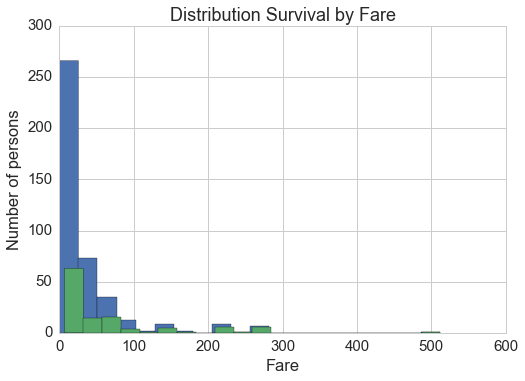

In [92]:
titanic_test["Fare"].hist(bins=20)
titanic_test[titanic_test['Survived_3']==1]["Fare"].hist(bins=20)
sns.plt.xlabel('Fare')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Fare')

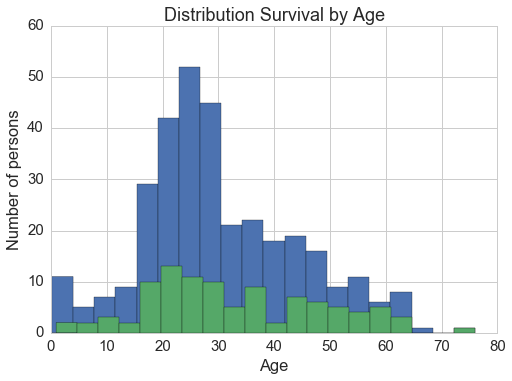

In [93]:
titanic_test["Age"].hist(bins=20)
titanic_test[titanic_test['Survived_3']==1]["Age"].hist(bins=20)
sns.plt.xlabel('Age')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Age')

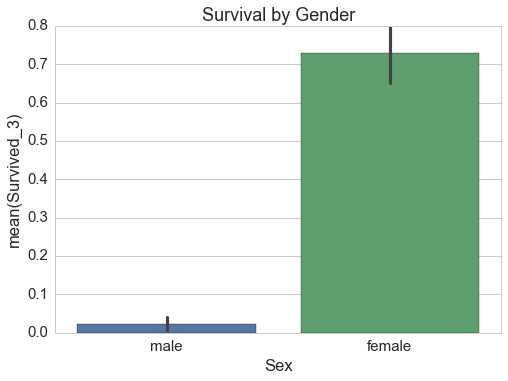

In [94]:
sns.barplot(x="Sex", y="Survived_3", data=titanic_test)
sns.plt.title('Survival by Gender')